# Machine Learning Application in predicting price of used cars


## Introduction:

This project aims at predicting the price of used cars sold in the United Staes. The data sets for this project come from online Kaggle data of used cars which are scrapped directly from the craigslist listings and maintained at the Kaggle site. Here, I will perform the following steps to build a machine learning model which can eventually be used to predict a price of a used car.
* Data Preparation and Cleaning
* Exploratory Data Analysis
* Feature engineering
* Machine learning model
* Fine tuning model
* Evaluating Models

## Goals: 
 This project is motivated by a need to build a reliable model to predict value of a used car sold over different regions of the US. While the price of a new car is pre-determined by manufacturer, the price of a used car is difficult to predict since it is affected by several factors. As such, determining a reasonable price is beneficial to both a buyer and a seller. Additionally, understanding a market trend of used car sold by individual on site like craiglist is helpful to allocate a listing price by a used car dealer. This will help car dealers to stay competitive in the growing market of used cars. In this project, we aim to use raw datasets generated from direct scrapping of craiglist sites from different region in the United States to build a machine learning model to predict used car price. 

## Data sets:
Data set is taken from Kaggle (https://www.kaggle.com/austinreese/craigslist-carstrucks-data). The data set is generated directly by scrapping craiglist sites within the last 2-3 months, as such, it represents most up to date used car data available in the internet. 

In [1]:
## Import necessary library

from scipy.stats import norm
from datetime import datetime
import time

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

import numpy as np
import pandas as pd
import os
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from PIL import Image  # Import image to np.array

## Datasets downloaded from https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [2]:
car_data = pd.read_csv("vehicles.csv")  ## reading whole datasets
print(car_data.shape)


(458213, 26)


In [3]:
car_data.nunique()  # Check how many unique values are present in each columns.


Unnamed: 0      458213
id              458213
url             458213
region             405
region_url         413
price            16924
year               110
manufacturer        43
model            31520
condition            6
cylinders            8
fuel                 5
odometer        108135
title_status         6
transmission         3
VIN             133620
drive                3
size                 4
type                13
paint_color         12
image_url       285404
description     384347
state               51
lat              61179
long             61559
posting_date    423805
dtype: int64

As we can see, the dataset has 458213 rows and 26 columns. 

In [4]:
car_data.info()  # basic information of dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
Unnamed: 0      458213 non-null int64
id              458213 non-null int64
url             458213 non-null object
region          458213 non-null object
region_url      458213 non-null object
price           458213 non-null int64
year            457163 non-null float64
manufacturer    439993 non-null object
model           453367 non-null object
condition       265273 non-null object
cylinders       287073 non-null object
fuel            454976 non-null object
odometer        402910 non-null float64
title_status    455636 non-null object
transmission    455771 non-null object
VIN             270664 non-null object
drive           324025 non-null object
size            136865 non-null object
type            345475 non-null object
paint_color     317370 non-null object
image_url       458185 non-null object
description     458143 non-null object
state           458213 non-null 

### As we can see in the above table, there are in total 26 columns. We want to keep only useful columns (features) for price prediction. There are 

In [5]:
car_data.describe()  # describe the datasets


,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [6]:
car_data.isnull().sum() / len(
    car_data
) * 100  ## find what percent of datasets in each columns are missing.


Unnamed: 0       0.000000
id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.229151
manufacturer     3.976317
model            1.057587
condition       42.107055
cylinders       37.349442
fuel             0.706440
odometer        12.069278
title_status     0.562402
transmission     0.532940
VIN             40.930528
drive           29.285070
size            70.130703
type            24.603841
paint_color     30.737452
image_url        0.006111
description      0.015277
state            0.000000
lat              1.625445
long             1.625445
posting_date     0.006111
dtype: float64

In [7]:
car_data.head()  # check first 5 datasets to check datasets.


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


## Data  Wrangling:
The focus of this section is to remove outliers, duplicates and missing values from the data. I will also drop columns containing attributes that are not relevant to the value of vehicle. The dropped columns are:
* Unnamed: 0
* ID
* url
* region
* region url
* cylinders  --> information likely encoded in model 
* VIN ---> unique number assigned to any vehicle. Nothing to do with its price.
* size ---> information encoded in body type
* paint color ---> likely more important for new car. Since our data set is quite large, I will drop this feature.
* image_url
* description ---> this may encode some useful information, and might interesting for a natural language processing exercise. 
* lat ---> For simplicity, I will only keep state name. So, latitude and longitude is not important.
* long
* posting_date --> This dataset is fairly recent (scrapped in last few months), so posting date is not relevant in price prediction. 


In [8]:
drop_col = [
    "Unnamed: 0",
    "id",
    "url",
    "region",
    "region_url",
    "cylinders",
    "VIN",
    "size",
    "paint_color",
    "image_url",
    "description",
    "lat",
    "long",
    "posting_date",
]
car_df = car_data.drop(drop_col, axis=1)


In [9]:
car_df.shape


(458213, 12)

In [10]:
car_df.describe()


,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


As we can see from the datset description, the minimum price of car is zero and max is 3.6 billion, these are likely outliers and we need to remove them. We can visualize the price distribution using a boxplot. 

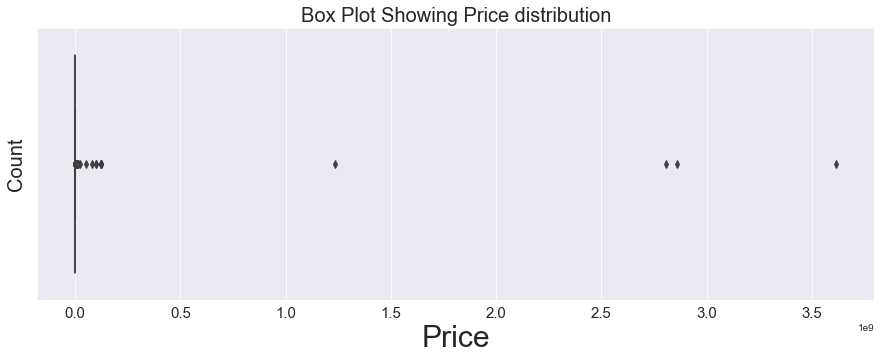

In [11]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
box = sns.boxplot(car_df["price"])
box.axes.set_title("Box Plot Showing Price distribution", fontsize=20)
box.set_xlabel("Price", fontsize=30)
box.set_ylabel("Count", fontsize=20)
box.tick_params(labelsize=15)


As we can see in the above plot, there are several price well above 1 billion. These are likely outliers data. Before removing the outliers, let also examine the price distribution for different years.

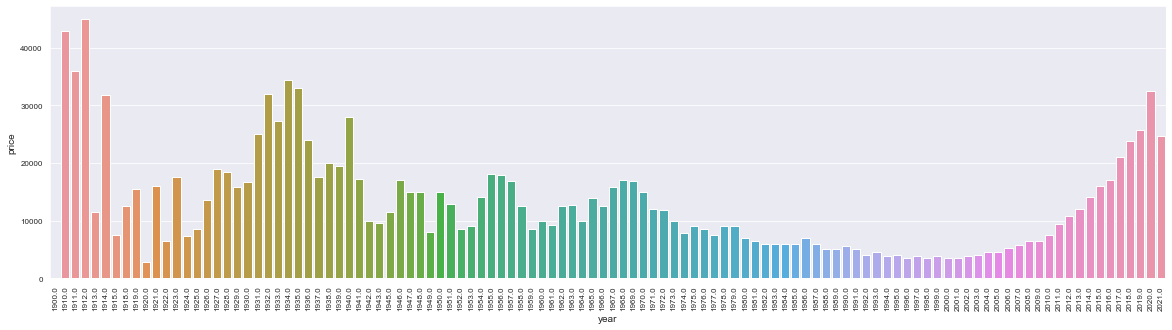

In [12]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
bar = sns.barplot(
    x=car_df.year, y=car_df.groupby("year")["price"].transform("median"), ax=ax
)
plt.xticks(rotation=90)
bar.tick_params(labelsize=8)


The above plot shows very interesting finding that the majority of very old car (older than 30 years) are actually priced much higher than 25-30 years old car. I think this is because those are likely vintage cars which are meticulously preserved. Their customer are most likely won't be typical craiglist customer. So, I think it makes sense to not include those cars in the further analysis. I will focus my analysis for those cars that are not older than 25 years. 

In [13]:
car_df = car_df[car_df["year"].between(1995, 2020)]
print(car_df.shape)


(440927, 12)


 In the next step, I will also remove outliers (those priced too high or too low) from the datasets. There are various methods to remove outliers. Here, I will remove any price that are above 1.5 times of interquartile range from the third quartile price. Similarly, I will remove any prices that are below 1.5 times of interquartile range from the first quartile price value. This will remove prices that are likely entered erroneously, for example , car priced at 3.6 billion in the dataset.

In [14]:
q1 = car_df["price"].quantile(0.25)
q3 = car_df["price"].quantile(0.75)
q_range = q3 - q1

car_df = car_df[car_df["price"].between(q1 - 1.5 * q_range, q3 + 1.5 * q_range)]
print(car_df.shape)


(429352, 12)


 We removed 430984-426404 = 11575 rows as outliers from the original data. Let's see te distribution of price after removing the outliers. 

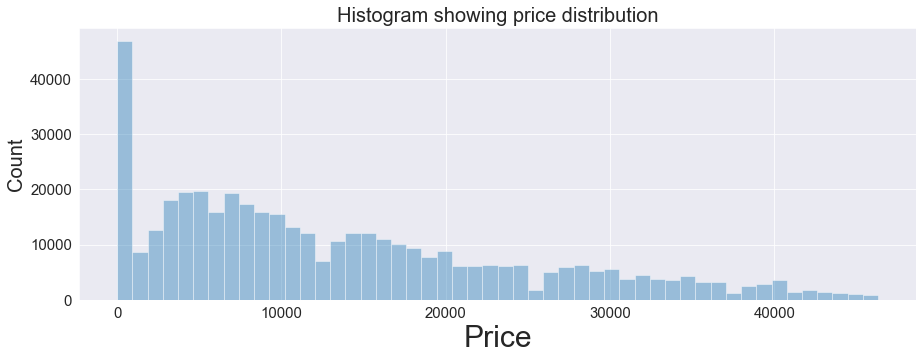

In [15]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
hist = sns.distplot(car_df["price"], kde=False)
hist.axes.set_title("Histogram showing price distribution", fontsize=20)
hist.set_xlabel("Price", fontsize=30)
hist.set_ylabel("Count", fontsize=20)
hist.tick_params(labelsize=15)


The higher price values are now removed. But there are still a large number of cars whose price is set to zero. This means there are many craiglist adds where seller doesn't want to reveal the price of their car. I will use a minimum threshold price of 1000 for further analysis. 

In [16]:
car_df = car_df[car_df.price > 1000]
print(car_df.shape)


(380610, 12)


In [17]:
car_df.describe()


,price,year,odometer
count,380610.000000,380610.000000,3.418080e+05
mean,15302.770193,2011.590796,1.055205e+05
std,10751.206394,5.336924,3.503834e+06
min,1003.000000,1995.000000,0.000000e+00
25%,6500.000000,2008.000000,4.485000e+04
50%,12695.000000,2013.000000,9.280000e+04
75%,21991.000000,2016.000000,1.381230e+05
max,46308.000000,2020.000000,2.043756e+09


Now, the price range looks more reasonable. But, as we can see in the above table, there are cars with odometer reading as high as 2 billion miles. This is too high to be true, so we will use a reasonable upper odometer threshold of 500000 miles.  

In [18]:
car_df = car_df[car_df.odometer < 500000]
print(car_df.shape)


(341120, 12)


We removed as many as 39490 vehicles with odometer reading above 500000 miles from the datasets. Now, let's check how randon rows in the datset look like.

In [19]:

car_df.sample(20)

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state
223291,20764,2019.0,honda,civic sedan,NaN,gas,21608.0,clean,automatic,fwd,NaN,mo
113283,20998,2015.0,dodge,charger,NaN,gas,60528.0,clean,automatic,rwd,sedan,fl
292926,27499,2015.0,ford,f150,excellent,gas,82365.0,clean,automatic,4wd,pickup,oh
107067,32490,2017.0,lexus,rx 350,NaN,gas,16550.0,clean,automatic,fwd,SUV,fl
158894,39655,2020.0,ford,f150 supercrew xlt 4x4,new,gas,1.0,clean,automatic,4wd,pickup,ia
55240,3900,2001.0,nissan,xterra,good,gas,177171.0,clean,automatic,rwd,SUV,ca
10177,2900,1998.0,ford,ranger,good,diesel,232000.0,clean,automatic,4wd,truck,az
226080,11995,2007.0,cadillac,escalade,NaN,other,162483.0,clean,automatic,NaN,NaN,mt
445008,38451,2020.0,ram,1500 classic,NaN,gas,9373.0,clean,automatic,4wd,NaN,co
146093,4300,2004.0,dodge,NaN,NaN,gas,166000.0,clean,manual,NaN,NaN,in


We can see several missing values in the above table. Let's check percentage of missing values in each column.

In [20]:
## Missing value percentage in each category
car_df.isnull().sum() / len(car_df) * 100


price            0.000000
year             0.000000
manufacturer     2.481238
model            0.602427
condition       36.839822
fuel             0.632036
odometer         0.000000
title_status     0.418914
transmission     0.424191
drive           24.606883
type            18.626876
state            0.000000
dtype: float64

There are no missing values in price and year columns. But there are still many missing values particularly in drive, condition and type category (>20% of whole datasets). I think these missing values can be replaced with "unknown". They might add some predictive value but likely not as important as other features. For other features (title status, transmission, manufacturer,model and fuel), I will simply drop those missing values. 

In [21]:
car_df[["condition", "drive", "type"]] = car_df[["condition", "drive", "type"]].fillna(
    "unknown"
)


In [22]:
## Check 10 random rows in the data.
car_df.sample(10)


,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state
88623,7900,2008.0,acura,rdx,excellent,gas,135808.0,clean,automatic,unknown,SUV,fl
325545,33995,2017.0,toyota,tacoma,unknown,gas,46704.0,rebuilt,automatic,4wd,truck,or
452909,41950,2018.0,chevrolet,silverado,unknown,gas,34970.0,clean,automatic,4wd,pickup,nc
43924,27500,2015.0,ford,transit 150,excellent,gas,64692.0,clean,automatic,unknown,van,ca
166046,15995,2014.0,chevrolet,camaro,unknown,gas,104910.0,clean,manual,rwd,other,ks
105247,28997,2009.0,ram,2500,unknown,diesel,149149.0,clean,manual,rwd,pickup,fl
396978,11500,2014.0,subaru,outback 2.5i wagon 4d,excellent,gas,96500.0,clean,automatic,4wd,wagon,vt
447303,2995,2006.0,subaru,b9 tribeca,unknown,gas,194452.0,clean,automatic,4wd,SUV,co
395148,5996,2009.0,ford,fusion,good,gas,72327.0,clean,automatic,fwd,sedan,vt
165678,10995,2017.0,nissan,sentra,unknown,gas,71409.0,clean,automatic,fwd,sedan,ks


In [23]:
## Let's drop missing values from manufacturer, model, title_status, transmission and fuel columns.
car_df.dropna(
    subset=["manufacturer", "model", "title_status", "transmission", "fuel"],
    inplace=True,
)


In [24]:
car_df.isnull().sum()


price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
dtype: int64

The data set is now cleaned. However, there are few features with very large categories. Let's do some explortory data analysis. 

## Exploratory Data Analysis

In [25]:
car_df.groupby(["model"]).count().sort_values("year", ascending=False).sample(50)


,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,type,state
model,,,,,,,,,,,
7 series 745li sedan 4d,1,1,1,1,1,1,1,1,1,1,1
equinox 1lt,4,4,4,4,4,4,4,4,4,4,4
sentra se-r,5,5,5,5,5,5,5,5,5,5,5
outlook,56,56,56,56,56,56,56,56,56,56,56
yaris se,3,3,3,3,3,3,3,3,3,3,3
i3 deka world,1,1,1,1,1,1,1,1,1,1,1
f150 super cab 4x4x,1,1,1,1,1,1,1,1,1,1,1
golf wagon,4,4,4,4,4,4,4,4,4,4,4
altima 2.5,50,50,50,50,50,50,50,50,50,50,50


In the above table, I group the data by "mode" and select 50 randam datas from the whole datsets. As you can see, there are many car models with very few entries. If we are to use "One hot encoder" for categorical features, this  will result in very large columns. So, I choose to only include models that have atleast 50 entries. This way my model will exclude rare car model, and only focus on popular car model sold.   

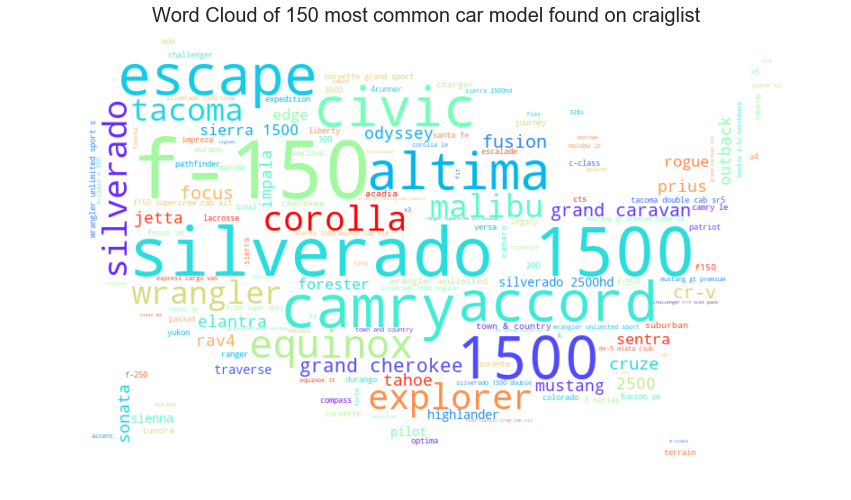

In [26]:
mask = np.array(Image.open("us_map.jpeg"))
car_model = car_df["model"]
carmodel = dict(zip(car_model.value_counts().index, car_model.value_counts().to_list()))

wc = WordCloud(
    background_color="white",
    colormap="rainbow",
    width=1500,
    height=900,
    max_words=150,
    mask=mask,
).generate_from_frequencies(carmodel)
plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.title("Word Cloud of 150 most common car model found on craiglist", fontsize=20)
plt.axis("off")
plt.show()


From the word cloud of most common mar model sold on craiglist, we can see f-150, escape, silverado 1500, camry, 1500 are some of the most common car model sold on craiglist.

In [27]:
make = dict(
    zip(
        car_df["manufacturer"].value_counts().index,
        car_df["manufacturer"].value_counts().to_list(),
    )
)


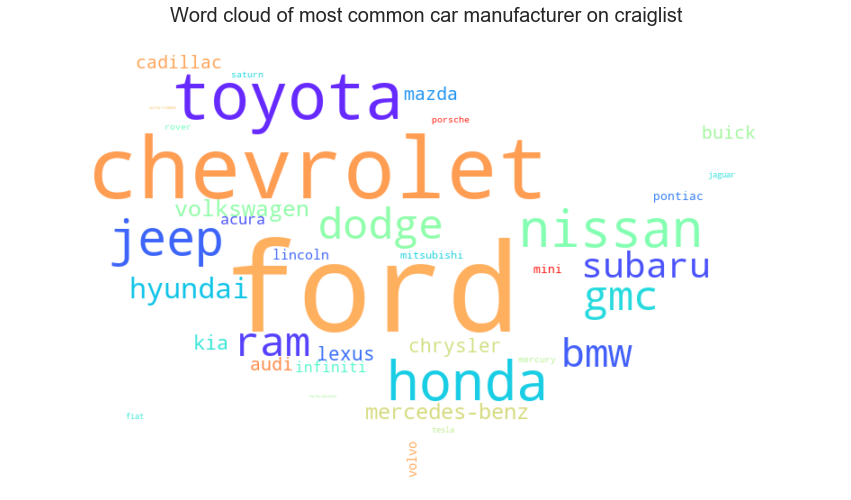

In [28]:
from PIL import Image

mask = np.array(Image.open("us_map.jpeg"))

wc = WordCloud(
    background_color="white",
    colormap="rainbow",
    width=1500,
    height=900,
    max_words=100,
    mask=mask,
).generate_from_frequencies(make)
plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.title("Word cloud of most common car manufacturer on craiglist", fontsize=20)
plt.axis("off")
plt.show()


From the above word cloud, we can see that the most common manufacturer of cars sold on craiglist are chevrolet, toyota, ford, honda and nissan.

Now, let's see price distribution of all the cars.

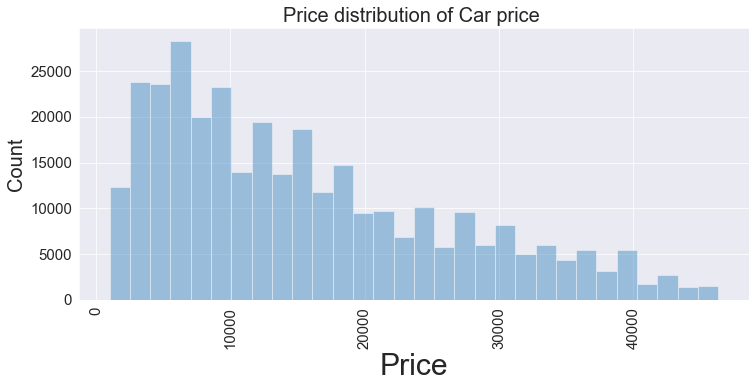

In [29]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 5))
hist = sns.distplot(car_df["price"], bins=30, kde=False)
plt.xticks(rotation=90)
hist.axes.set_title("Price distribution of Car price ", fontsize=20)
hist.set_xlabel("Price", fontsize=30)
hist.set_ylabel("Count", fontsize=20)
hist.tick_params(labelsize=15)


From the above, plot we can see that most cars are priced between 1000 and 10000. This price range falls within our expectation of a used car price. 

Now let's how the median car price change over time. 

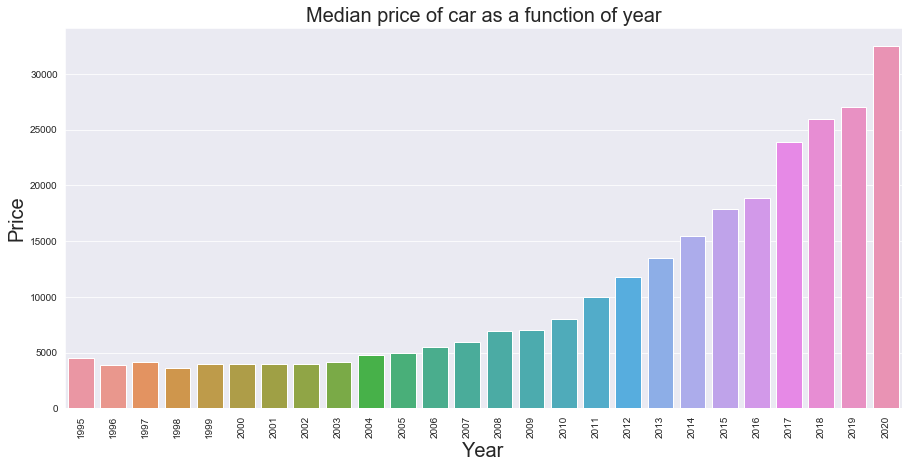

In [30]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.year.astype("int32"),
    y=car_df.groupby("year")["price"].transform("median"),
    ax=ax,
)
bar.axes.set_title("Median price of car as a function of year", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("Year", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=10)


We can see that the car price increases with the year. That means newer car are priced at higher price than older car which is what we expect. The latest 2020 car model are priced highest on the craiglist.   
Next, let's check price distribution for different car conditions. 

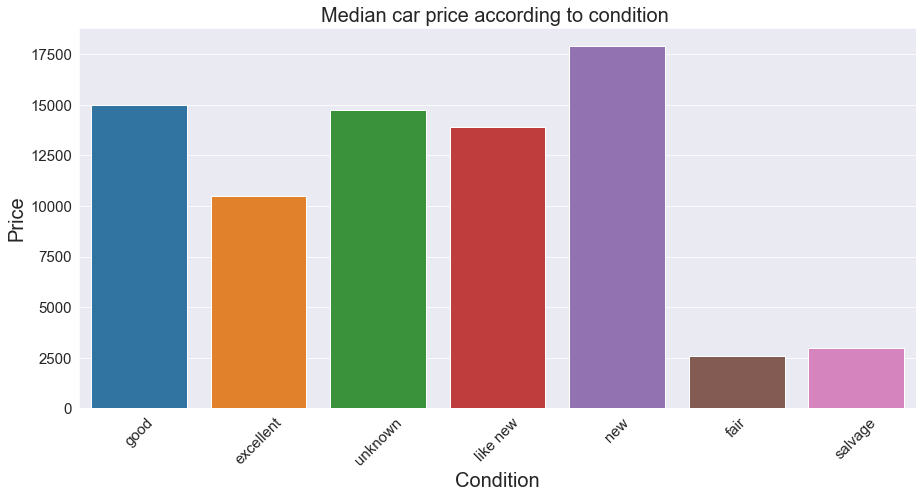

In [31]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.condition,
    y=car_df.groupby("condition")["price"].transform("median"),
    ax=ax,
)
bar.axes.set_title("Median car price according to condition ", fontsize=20)
plt.xticks(rotation=45)
bar.set_xlabel("Condition", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=15)


As expected, new and good condition car are priced higher on average. Cars with fair and salvage condition are priced the lowest. 

Let's also check the price distribution according to the title status.

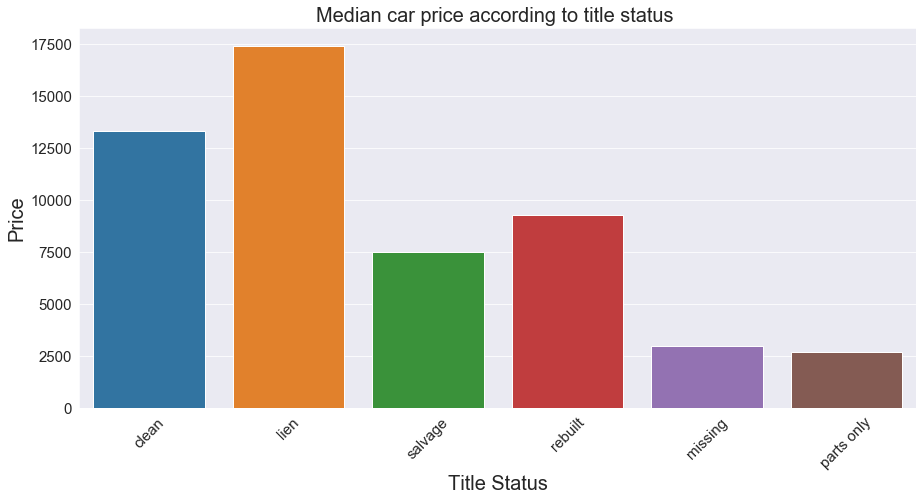

In [32]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.title_status,
    y=car_df.groupby("title_status")["price"].transform("median"),
    ax=ax,
)
bar.axes.set_title("Median car price according to title status ", fontsize=20)
plt.xticks(rotation=45)
bar.set_xlabel("Title Status", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=15)


Cars with the "lien" title status are priced highest. These are likely recently bought cars, and seller are yet to pay off their car loans. The cars with clean title status are the next highest priced in the category. Not surprisingly, cars with the missing title and parts only are the least priced cars.

Next, let's check which manufacturer's car are piced most expensive. 

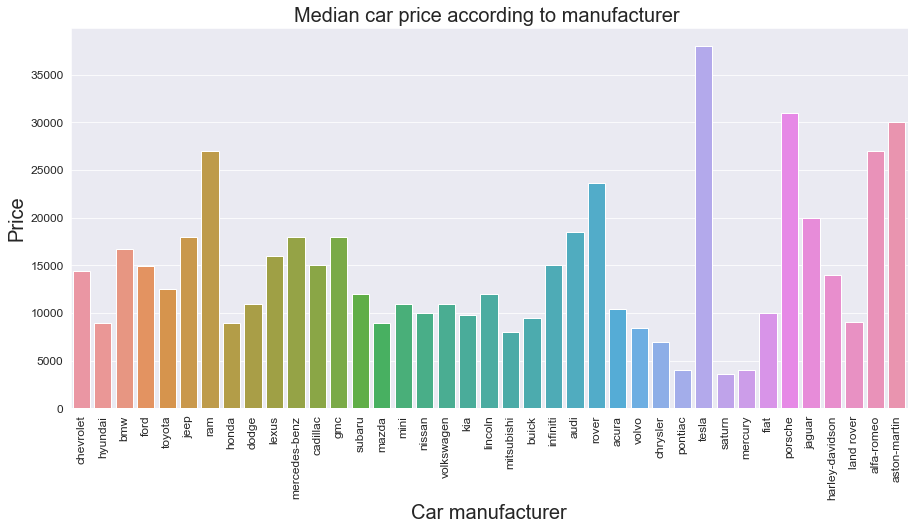

In [33]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.manufacturer,
    y=car_df.groupby("manufacturer")["price"].transform("median"),
    ax=ax,
)
bar.axes.set_title("Median car price according to manufacturer ", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("Car manufacturer", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=12)


Not surprisingly, the highest priced car are from luxury car manufacturer with Tesla, Aston Martin and Porsche taking the top three spots. 

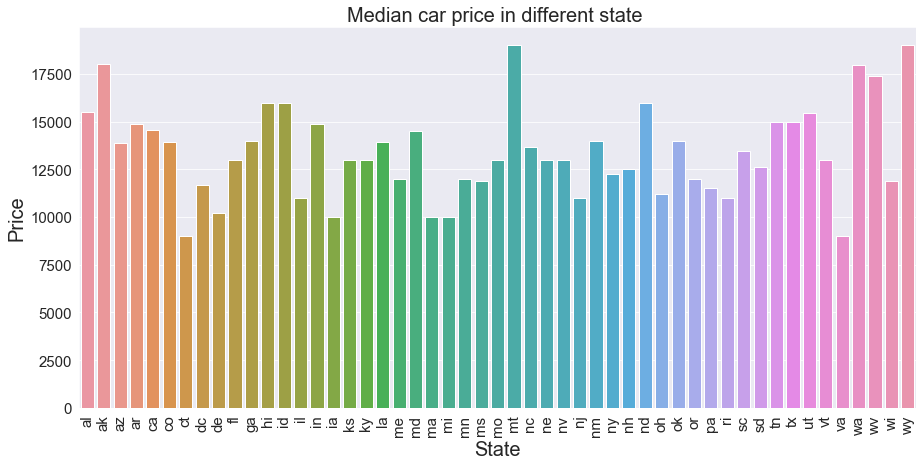

In [34]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.state, y=car_df.groupby("state")["price"].transform("median"), ax=ax
)
bar.axes.set_title("Median car price in different state ", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("State", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=15)


In the above plot, we can see that the craiglist cars are the most expensive in Wyoming while the least expensive in Connecticut. Let's also check number of cars sold in each state.

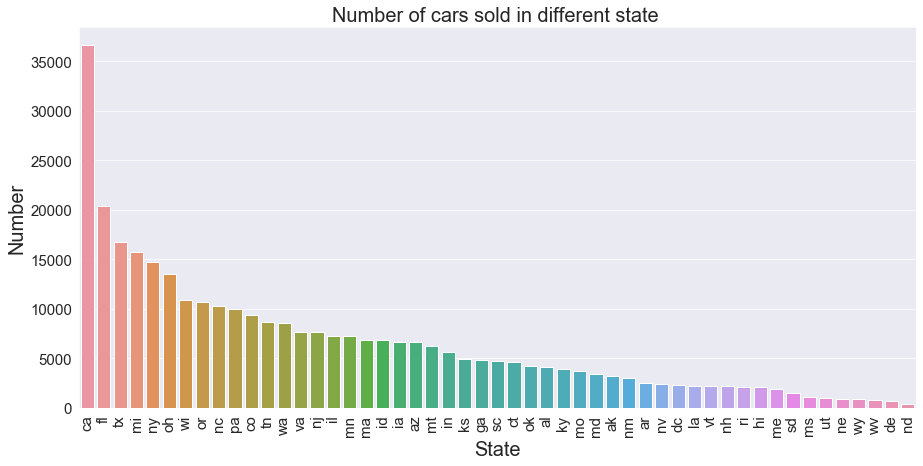

In [35]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x="state",
    y="price",
    data=car_df.groupby(["state"], as_index=False)
    .count()
    .sort_values("price", ascending=False),
    ax=ax,
)
bar.axes.set_title("Number of cars sold in different state ", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("State", fontsize=20)
bar.set_ylabel("Number", fontsize=20)
bar.tick_params(labelsize=15)


The highest number of craiglist used cars are listed in the most populous states like California, Florida and Texas. 

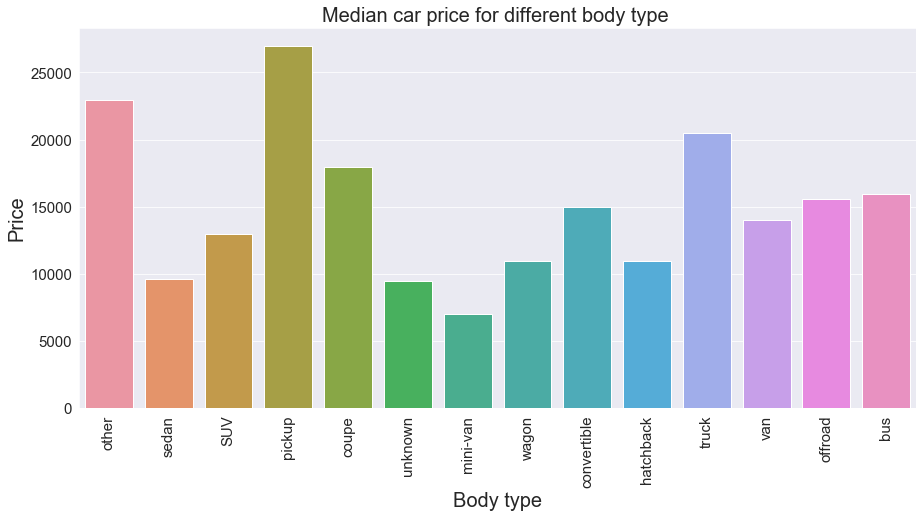

In [36]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.type, y=car_df.groupby("type")["price"].transform("median"), ax=ax
)
bar.axes.set_title("Median car price for different body type ", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("Body type", fontsize=20)
bar.set_ylabel("Price", fontsize=20)
bar.tick_params(labelsize=15)


We can see that the most common car body type on craiglist listing is pickup cars followed by other and truck. 

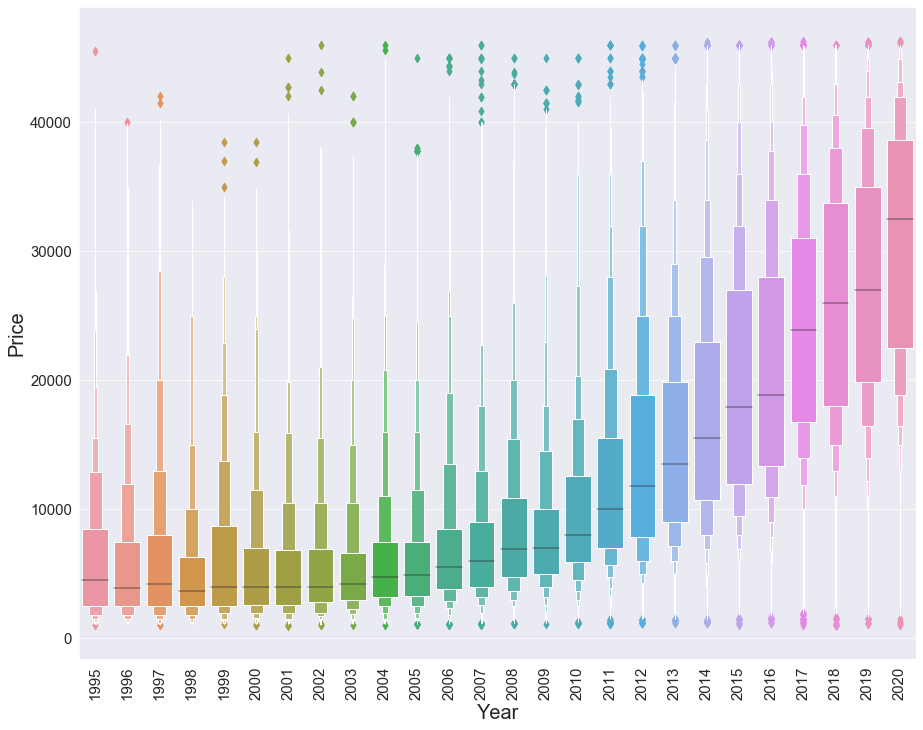

In [37]:
fig, ax = plt.subplots(figsize=(15, 12))
box = sns.boxenplot(car_df["year"].astype("int32"), car_df["price"])
plt.xticks(rotation=90)
box.set_xlabel("Year", fontsize=20)
box.set_ylabel("Price", fontsize=20)
bar.axes.set_title("Car price distribution in different years", fontsize=20)
box.tick_params(labelsize=10)
box.tick_params(labelsize=15)


In the above plot, we can see price distribution of cars in different years showing increase in car price in recent years. 

(0, 500000)

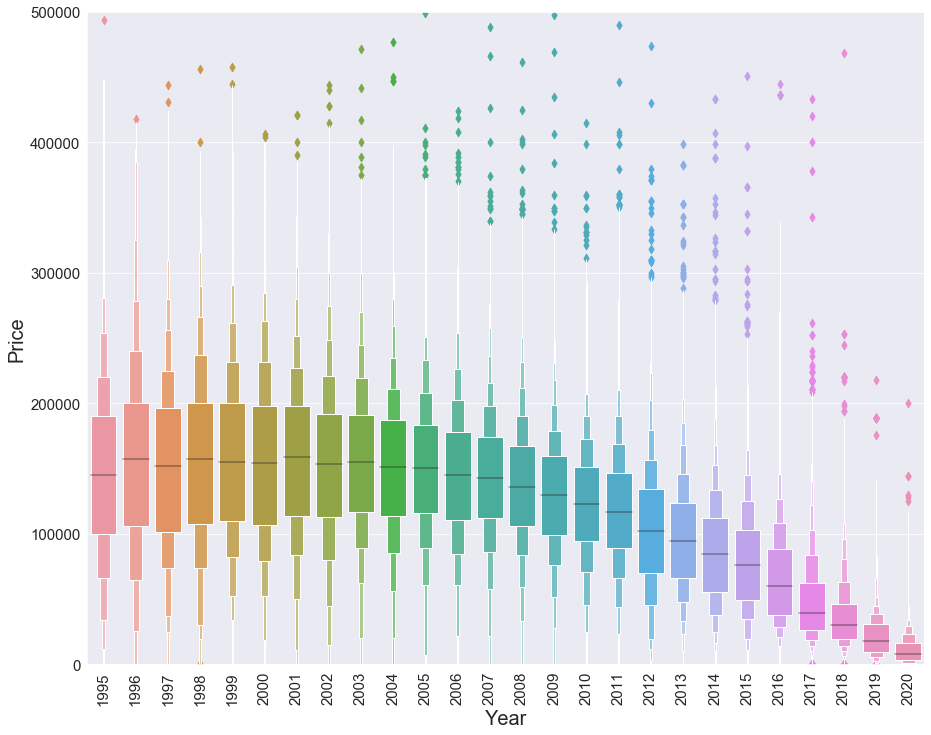

In [38]:
fig, ax = plt.subplots(figsize=(15, 12))
box = sns.boxenplot(car_df["year"].astype("int32"), car_df["odometer"])
plt.xticks(rotation=90)
box.set_xlabel("Year", fontsize=20)
box.set_ylabel("Price", fontsize=20)
bar.axes.set_title("Odometer distribution according to year ", fontsize=20)
box.tick_params(labelsize=10)
box.tick_params(labelsize=15)
ax.set_ylim(0, 500000)


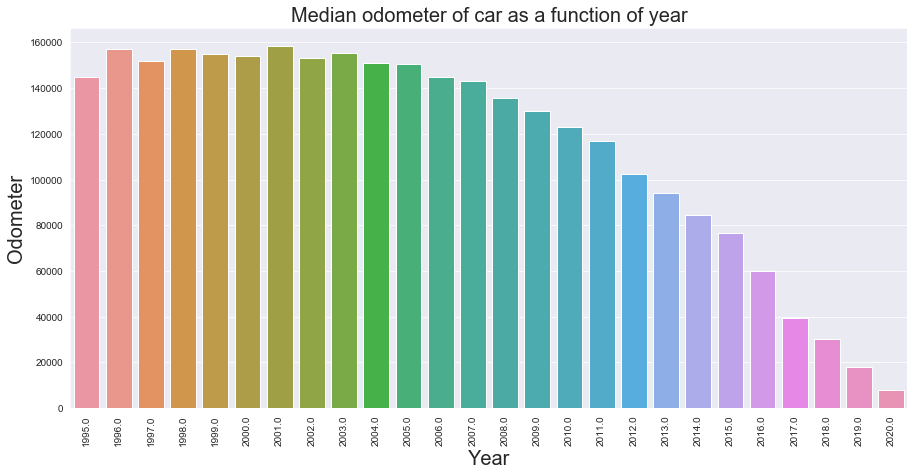

In [39]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 7))
bar = sns.barplot(
    x=car_df.year, y=car_df.groupby("year")["odometer"].transform("median"), ax=ax
)
bar.axes.set_title("Median odometer of car as a function of year", fontsize=20)
plt.xticks(rotation=90)
bar.set_xlabel("Year", fontsize=20)
bar.set_ylabel("Odometer", fontsize=20)
bar.tick_params(labelsize=10)


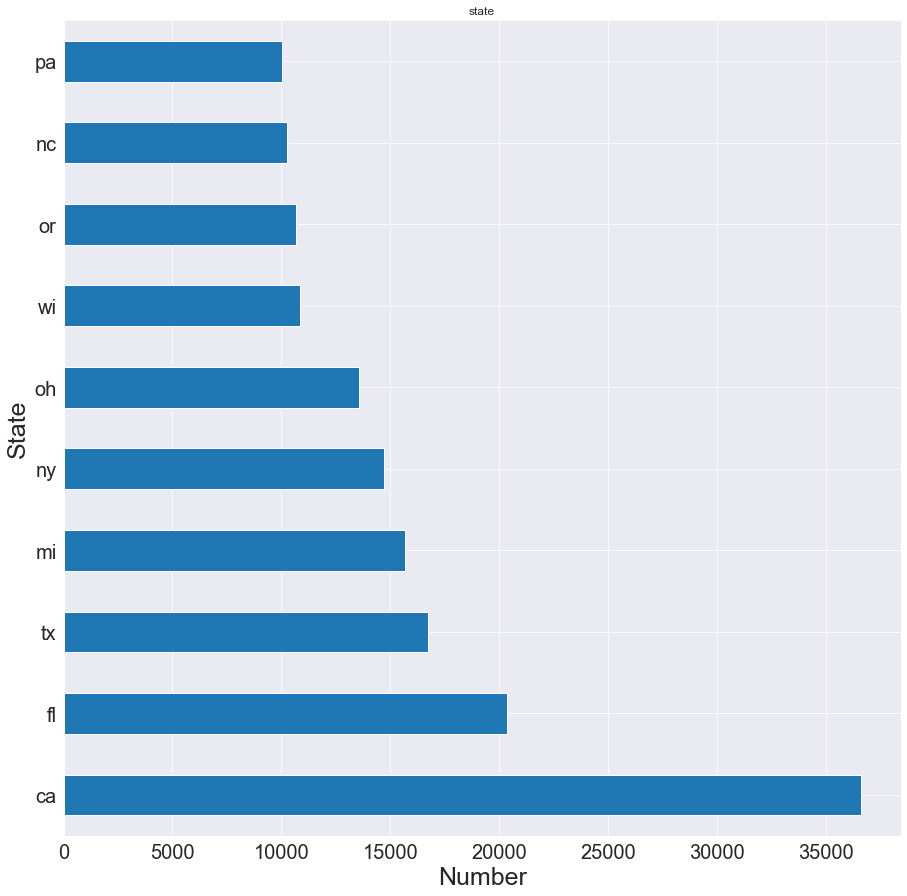

In [40]:
car_df.state.value_counts().head(10).plot(kind="barh", subplots=True, figsize=(15, 15))
plt.xlabel("Number", fontsize=25)
plt.ylabel("State", fontsize=25)
plt.tick_params(labelsize=20)


In [41]:
car_df.describe()


,price,year,odometer
count,326433.000000,326433.000000,326433.000000
mean,15738.474603,2011.880885,96005.531717
std,10762.065656,5.214264,61354.168480
min,1003.000000,1995.000000,0.000000
25%,6985.000000,2008.000000,44267.000000
50%,12997.000000,2013.000000,92024.000000
75%,22900.000000,2016.000000,137457.000000
max,46308.000000,2020.000000,498888.000000


#### As we can see from the above table, price and odometer are spread over a wide range. So we will convert them into log scale. 

## Feature Engineering

In [42]:
## Change price and odometer to logscale since they spread over a wider range.
car_df["log_price"] = np.log(car_df["price"])
car_df["log_odometer"] = np.log(car_df["odometer"] + 10)


In [43]:
##Let's check number of unique features
car_df.nunique()


price           13551
year               26
manufacturer       39
model           18590
condition           7
fuel                5
odometer        93791
title_status        6
transmission        3
drive               4
type               14
state              51
log_price       13551
log_odometer    93791
dtype: int64

#### The column "model" contains almost 18590 unique values. This is too large for "One Hot Encoding". So, we will only keep those models which are repeated at least 50 times (~1 per state) in the whole data sets. The remaining models are most likely rare car model, and we will remove them from our modeling. 

In [44]:
# Let's drop 'price' and 'odometer' columns since they are now replaced by log_price and log_odometer.
car_df.drop(['price','odometer'],axis=1,inplace=True)

In [45]:
# Let's check correlation matrix.
car_df.corr()


,year,log_price,log_odometer
year,1.000000,0.697617,-0.410881
log_price,0.697617,1.000000,-0.384775
log_odometer,-0.410881,-0.384775,1.000000


(3.0, 0.0)

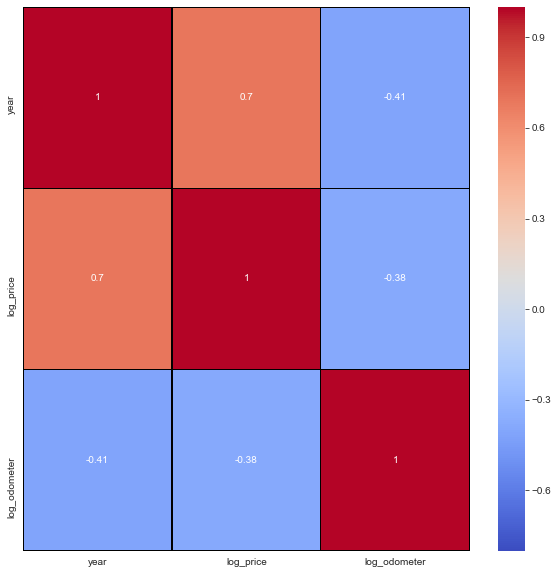

In [46]:
## Plot correlation matrix
corr = car_df.corr()
# fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr,
    xticklabels=["year", "log_price", "log_odometer"],
    yticklabels=["year", "log_price", "log_odometer"],
    vmin=-0.8,
    vmax=1,
    annot=True,
    cmap="coolwarm",
    linewidth=0.3,
    linecolor="black",
)
ax.figure.set_size_inches(10, 10)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
# ax.tick_params(labelsize=15)


 As shown by the correlation matrix, price is positively correlated with year and negatively correlated with odometer. 

The column "model" contains almost 18590 unique values. This is too large for "One Hot Encoding". So, we will only keep those models which are repeated at least 50 times (~1 per state) in the whole data sets. The remaining models are most likely rare car model, and we will remove them from our modeling.



In [47]:
df_model = pd.DataFrame(
    {"num": car_df.groupby("model").size()}
).reset_index()  # data frame having columns car model and count of those model.
model_list = df_model[df_model["num"] > 50][
    "model"
].values  ## list of model with more than 50 craiglist listing.


In [48]:
car_final = car_df[car_df["model"].isin(model_list)]

##This is the final dataframe that we will use for machine learning modeling.


In [49]:
## Let's check how our final data frame looks like by looking at 20 random rows.
car_final.sample(20)


,year,manufacturer,model,condition,fuel,title_status,transmission,drive,type,state,log_price,log_odometer
415942,2015.0,dodge,challenger,unknown,gas,clean,manual,rwd,coupe,wa,10.126591,10.930908
189963,2012.0,hyundai,santa fe,excellent,gas,clean,automatic,4wd,SUV,ma,9.116030,11.422289
448403,2015.0,ford,mustang,like new,gas,clean,manual,unknown,unknown,fl,7.313220,9.887511
433604,2016.0,ford,escape titanium,like new,gas,clean,automatic,4wd,SUV,wi,9.947504,9.649240
54583,2006.0,ford,f350,excellent,diesel,clean,automatic,4wd,truck,ca,10.021271,11.462789
114984,2016.0,porsche,cayenne sport utility 4d,good,gas,clean,automatic,unknown,SUV,fl,10.518403,10.525407
365338,2012.0,honda,cr-v,unknown,gas,clean,automatic,fwd,SUV,tn,9.301916,11.855579
239710,2018.0,toyota,rav4,excellent,gas,clean,automatic,fwd,unknown,nc,9.769956,10.736788
194578,2019.0,chevrolet,silverado 1500 crew,good,gas,clean,other,unknown,pickup,mi,10.462818,9.250138
254867,2019.0,ford,f150 supercrew cab xlt,good,gas,clean,other,unknown,pickup,nj,10.490996,9.294957


In [50]:
car_final.describe()


,year,log_price,log_odometer
count,243986.000000,243986.000000,243986.000000
mean,2012.060770,9.382475,11.112051
std,5.033943,0.786602,1.217682
min,1995.000000,6.910751,2.302585
25%,2009.000000,8.839277,10.703688
50%,2013.000000,9.472012,11.444186
75%,2016.000000,10.021271,11.836781
max,2020.000000,10.741925,13.120157


In [51]:
car_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243986 entries, 0 to 458211
Data columns (total 12 columns):
year            243986 non-null float64
manufacturer    243986 non-null object
model           243986 non-null object
condition       243986 non-null object
fuel            243986 non-null object
title_status    243986 non-null object
transmission    243986 non-null object
drive           243986 non-null object
type            243986 non-null object
state           243986 non-null object
log_price       243986 non-null float64
log_odometer    243986 non-null float64
dtypes: float64(3), object(9)
memory usage: 24.2+ MB


The final data frame consists of 243896 entries (rows) having 11 feature columns and 1 price column. Among the 11 feature columns, all except year and year are categorical features. We will use One Hot Encoding to convert each unique category to a separate column. 

### One Hot Encoding:

In [52]:
## dataframe having categorical features.
car_final_cat = car_final[
    [
        "manufacturer",
        "model",
        "condition",
        "fuel",
        "title_status",
        "transmission",
        "drive",
        "type",
        "state",
    ]
]
## Dataframe having numerical features.
car_final_num = car_final[["year", "log_odometer"]]
cat_encoder = OneHotEncoder()
car_final_cat_1hot = cat_encoder.fit_transform(car_final_cat)
one_hot = pd.DataFrame(car_final_cat_1hot.toarray())


In [53]:
one_hot


,0,1,2,3,4,5,6,7,8,9,...,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243981,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
243982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
243983,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
243984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The One Hot Encoding resulted into 1057 columns in total. 

In [54]:
## Let's also do standard scaling to our numerical features.
scaler = StandardScaler()
car_num_scale = scaler.fit_transform(car_final_num)
car_num_scale = pd.DataFrame(car_num_scale)


In [55]:
Y_prepared = car_final["log_price"]


In [56]:
car_num_scale.rename(columns={0: "year_scale", 1: "odometer_scale"}, inplace=True)


In [57]:
car_num_scale


,year_scale,odometer_scale
0,-0.409376,-0.587455
1,0.385232,0.274983
2,0.782535,-0.573828
3,-0.012072,-2.610679
4,0.981187,-0.669889
...,...,...
243981,0.782535,-0.520295
243982,0.583883,0.391783
243983,0.385232,0.184069
243984,1.179839,-0.609152


In [58]:
X_prepared = one_hot.join(car_num_scale)


#### X_prepared and Y_prepared will be used as input in our machine learning models. 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, Y_prepared, test_size=0.3
)


## Dimensionality Reduction: Principle Component Analysis

Since our input data (X_prepared) is quite large (243986 x 1059), I found running machine learning models takes much longer time. So, I decided to use Principle Component Analysis to reduce the dimension of the datasets. This will remove irrelevant features from the data. 

In [60]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_


259

In [65]:
X_train_pca


array([[ 1.48794938e+00, -9.45481319e-01,  8.70118202e-01, ...,
        -5.24036590e-04,  3.26889426e-03, -1.02170332e-02],
       [ 1.28407958e+00,  6.03156391e-02, -2.91901895e-01, ...,
         1.61332497e-04,  7.46912767e-04, -3.86375011e-04],
       [ 1.12194786e+00, -7.91008626e-01, -7.56006893e-01, ...,
        -4.11024686e-04,  1.61047856e-03, -1.01720752e-03],
       ...,
       [ 1.75943383e+00, -2.03479969e-01, -8.21748346e-01, ...,
        -1.54597150e-03,  1.36682840e-03, -1.85082146e-03],
       [ 1.27480982e+00, -9.09821618e-01,  2.06837592e-01, ...,
        -9.03522224e-04,  1.83094550e-03,  1.54590743e-04],
       [-2.57540063e+00,  8.25471508e-01, -7.55928937e-01, ...,
        -2.42231439e-03, -6.72473937e-03,  2.69393515e-03]])

With PCA dimensionality reduction, we now reduce features from 1059 to 259, while still maitaining 95% variance in the datasets. We will use this datasets to perform further modeling.